In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install huggingface_hub

In [24]:
from huggingface_hub import notebook_login

notebook_login()

In [2]:
pip install datasets

In [ ]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=c88639beef646889d9826ebc03998b77688f195fbd6d6d22829bfc470f83a9af
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [4]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [1]:
import accelerate

accelerate.__version__

'0.31.0'

In [3]:
import torch
torch.cuda.empty_cache()

In [ ]:
!pip install prettyprint
import prettyprint as pprint

  Preparing metadata (setup.py) ... done
  Created wheel for prettyprint: filename=prettyprint-0.1.5-py3-none-any.whl size=3027 sha256=1a844ebdf0c53a3cc082d7fc0327d7d57c0b250bf96dbf448a78637d1f36628d
  Stored in directory: /root/.cache/pip/wheels/b2/d0/51/477413885481c635ab7c6400f96f47b8a0971bbc1241ff9c9f
Successfully built prettyprint


In [ ]:
!nvidia-smi

Mon May 27 04:30:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
pip install matplotlib

In [ ]:
pip install scikit-learn

In [4]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import LEDTokenizer, LEDForConditionalGeneration, Trainer, TrainingArguments
from datasets import Dataset, load_metric

# Load data from txt files
def load_data(input_dir, target_dir):
    data = {'input_text': [], 'target_text': []}
    input_files = glob.glob(os.path.join(input_dir, '*.txt'))

    for input_file in input_files:
        filename = os.path.basename(input_file)
        target_file = os.path.join(target_dir,filename)

        with open(input_file, 'r',encoding="utf8") as f:
            input_text = f.read()
        with open(target_file, 'r',encoding="utf8") as f:
            target_text = f.read()

        data['input_text'].append(input_text)
        data['target_text'].append(target_text)

    return pd.DataFrame(data)

# Define dataset paths
input_dir = '/content/drive/MyDrive/RA_Internship/PACSUM/DATASET_PACSUM/dataset/inputs'
target_dir = '/content/drive/MyDrive/RA_Internship/PACSUM/DATASET_PACSUM/dataset/targets'

# Load data
data_df = load_data(input_dir, target_dir)

print(data_df)

# Split data
train_df, temp_df = train_test_split(data_df, test_size=0.2, random_state=42)
eval_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Convert to Dataset
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)
test_dataset = Dataset.from_pandas(test_df)







                                            input_text  \
0    a large number of current language processing ...   
1    current automatic summarizers usually rely on ...   
2    even moderately long documents typically addre...   
3    word sense disambiguation is often cast as a p...   
4    we present a new parser for parsing down to pe...   
..                                                 ...   
994  the ability to determine the named entities in...   
995  many statistical or machine-learning approache...   
996  the natural language processing community is i...   
997  in this paper, we focus on the problem of dete...   
998  when dealing with large amounts of text, findi...   

                                           target_text  
0    tnt - a statistical part-of-speech tagger trig...  
1    sentence reduction for automatic text summariz...  
2    advances in domain independent linear text seg...  
3    a simple approach to building ensembles of nai...  
4    a maximum-ent

In [5]:
from transformers import AutoTokenizer

In [6]:
tokenizer = AutoTokenizer.from_pretrained("allenai/led-base-16384")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [9]:
max_input_length = 8192
max_output_length = 512
batch_size = 2

In [11]:
def process_data_to_model_inputs(batch):
    # tokenize the inputs and labels
    inputs = tokenizer(
        batch["input_text"],
        padding="max_length",
        truncation=True,
        max_length=max_input_length,
    )
    outputs = tokenizer(
        batch["target_text"],
        padding="max_length",
        truncation=True,
        max_length=max_output_length,
    )

    batch["input_ids"] = inputs.input_ids
    batch["attention_mask"] = inputs.attention_mask

    # create 0 global_attention_mask lists
    batch["global_attention_mask"] = len(batch["input_ids"]) * [
        [0 for _ in range(len(batch["input_ids"][0]))]
    ]

    # since above lists are references, the following line changes the 0 index for all samples
    batch["global_attention_mask"][0][0] = 1
    batch["labels"] = outputs.input_ids

    # We have to make sure that the PAD token is ignored
    batch["labels"] = [
        [-100 if token == tokenizer.pad_token_id else token for token in labels]
        for labels in batch["labels"]
    ]

    return batch

In [10]:
train_dataset = train_dataset.map(
    process_data_to_model_inputs,
    batched=True,
    batch_size=batch_size,

)

Map:   0%|          | 0/799 [00:00<?, ? examples/s]

In [ ]:
pip install prettyprint

  Preparing metadata (setup.py) ... done
  Created wheel for prettyprint: filename=prettyprint-0.1.5-py3-none-any.whl size=3027 sha256=bc0c055dddc3c4209507b1e01eb43ed51512c1920a2151551c238e29e30b89bc
  Stored in directory: /root/.cache/pip/wheels/b2/d0/51/477413885481c635ab7c6400f96f47b8a0971bbc1241ff9c9f
Successfully built prettyprint


In [ ]:
import prettyprint as pprint

ModuleNotFoundError: No module named 'prettyprint'

In [12]:
print("INPUT: ",train_dataset['input_text'][146])
print("TARGET:  ",train_dataset['target_text'][146])
print("hello")

INPUT:  in these results, the generative model performs significantly better than the others, and does about equally well at assigning pa.rt- of-speech tags. 1 in t roduct ion in recent years, the statistical parsing community has begun to reach out; for syntactic formalisms that recognize the individuality of words, l,ink grammars (sleator and pemperley, 1991) and lex- icalized tree-adjoining ranunars (schabes, 1992) have now received stochastic treatments. other researchers, not wishing to abandon context-flee grammar (ci"g) but disillusioned with its lexica] blind spot, have tried to re-parameterize stochas- tic ci"g in context-sensitive ways (black et al., 1992) or have augmented the formalism with lex- ical headwords (magerman, 1995; collins, 11996). in this paper, we 1)resent a [lexible l)robat)ilistic parser that simultaneously assigns both part-of- sl)eech tags and a bare-bones dependency struc- ture (illustrate.d in l!igure 1). the choice o t a simple syntactic structure is de

In [13]:
eval_dataset = eval_dataset.map(
    process_data_to_model_inputs,
    batched=True,
    batch_size=batch_size,

)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [14]:
from transformers import AutoModelForSeq2SeqLM

In [15]:
led = AutoModelForSeq2SeqLM.from_pretrained("allenai/led-base-16384", gradient_checkpointing=True, use_cache=False)

pytorch_model.bin:   0%|          | 0.00/648M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [16]:
# set generate hyperparameters
led.config.num_beams = 2
led.config.max_length = 512
led.config.min_length = 100
led.config.length_penalty = 2.0
led.config.early_stopping = True
led.config.no_repeat_ngram_size = 3

In [ ]:
!pip install rouge_score
rouge = load_metric("rouge")

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=33f623cb03c94c81d403f7425dedad596efad637e9caa9ffa3111bf225e96a26
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


<ipython-input-21-ff1de7b4ae6d>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric("rouge")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [17]:
def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = tokenizer.pad_token_id
    label_str = tokenizer.batch_decode(labels_ids, skip_special_tokens=True)

    rouge_output = rouge.compute(
        predictions=pred_str, references=label_str, rouge_types=["rouge2"]
    )["rouge2"].mid

    return {
        "rouge2_precision": round(rouge_output.precision, 4),
        "rouge2_recall": round(rouge_output.recall, 4),
        "rouge2_fmeasure": round(rouge_output.fmeasure, 4),
    }

In [18]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [19]:
# enable fp16 apex training
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    fp16=True,
    output_dir="./",
    logging_steps=5,
    eval_steps=10,
    save_steps=10,
    save_total_limit=2,
    gradient_accumulation_steps=4,
    num_train_epochs=5,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [20]:
trainer = Seq2SeqTrainer(
    model=led,
    tokenizer=tokenizer,
    args=training_args,
    #compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

In [21]:
trainer.train()

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'min_length': 100, 'early_stopping': True, 'num_beams': 2, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. T

TrainOutput(global_step=500, training_loss=2.2905156116485594, metrics={'train_runtime': 2618.8179, 'train_samples_per_second': 1.525, 'train_steps_per_second': 0.191, 'total_flos': 2.157463663017984e+16, 'train_loss': 2.2905156116485594, 'epoch': 5.0})

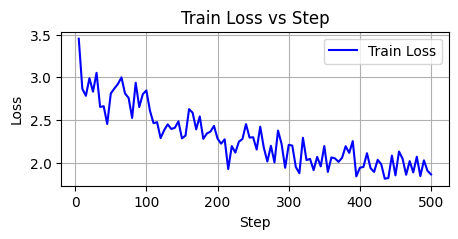

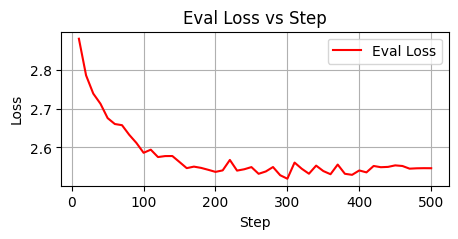

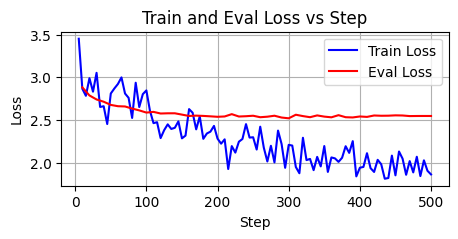

In [22]:
import pandas as pd
df=pd.DataFrame(trainer.state.log_history)
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined, and train_loss and eval_loss are subsets of df
train_loss = df[['loss', 'step']]
eval_loss = df[['eval_loss', 'step']]

# Remove NaN rows in both dataframes
train_loss_clean = train_loss.dropna()
eval_loss_clean = eval_loss.dropna()

# Plotting the loss vs step for train_loss
plt.figure(figsize=(5, 2))
plt.plot(train_loss_clean['step'], train_loss_clean['loss'], label='Train Loss', color='blue')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Train Loss vs Step')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the loss vs step for eval_loss
plt.figure(figsize=(5, 2))
plt.plot(eval_loss_clean['step'], eval_loss_clean['eval_loss'], label='Eval Loss', color='red')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Eval Loss vs Step')
plt.legend()
plt.grid(True)
plt.show()

# Plotting both losses together
plt.figure(figsize=(5, 2))
plt.plot(train_loss_clean['step'], train_loss_clean['loss'], label='Train Loss', color='blue')
plt.plot(eval_loss_clean['step'], eval_loss_clean['eval_loss'], label='Eval Loss', color='red')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Train and Eval Loss vs Step')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
df

loss  grad_norm  learning_rate  epoch  step  eval_loss  eval_runtime  \
0    3.4511   4.837308   4.950000e-05   0.05     5        NaN           NaN   
1    2.8648   3.968866   4.900000e-05   0.10    10        NaN           NaN   
2       NaN        NaN            NaN   0.10    10   2.881588       13.1553   
3    2.7824   3.681087   4.850000e-05   0.15    15        NaN           NaN   
4    2.9889   3.684774   4.800000e-05   0.20    20        NaN           NaN   
..      ...        ...            ...    ...   ...        ...           ...   
146     NaN        NaN            NaN   4.90   490   2.546269       13.1952   
147  1.9039   3.169846   5.000000e-07   4.95   495        NaN           NaN   
148  1.8617   4.006496   0.000000e+00   5.00   500        NaN           NaN   
149     NaN        NaN            NaN   5.00   500   2.546145       13.1942   
150     NaN        NaN            NaN   5.00   500        NaN           NaN   

     eval_samples_per_second  eval_steps_per_second  train_runtime  \
0                        NaN                    NaN            NaN   
1                        NaN                    NaN            NaN   
2                      7.601                  3.801            NaN   
3                        NaN                    NaN            NaN   
4                        NaN                    NaN            NaN   
..                       ...                    ...            ...   
146                    7.578                  3.789            NaN   
147                      NaN                    NaN            NaN   
148                      NaN                    NaN            NaN   
149                    7.579                  3.790            NaN   
150                      NaN                    NaN      2618.8179   

     train_samples_per_second  train_steps_per_second    total_flos  \
0                         NaN                     NaN           NaN   
1                         NaN                     NaN           NaN   
2                         NaN                     NaN           NaN   
3                         NaN                     NaN           NaN   
4                         NaN                     NaN           NaN   
..                        ...                     ...           ...   
146                       NaN                     NaN           NaN   
147                       NaN                     NaN           NaN   
148                       NaN                     NaN           NaN   
149                       NaN                     NaN           NaN   
150                     1.525                   0.191  2.157464e+16   

     train_loss  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
146         NaN  
147         NaN  
148         NaN  
149         NaN  
150    2.290516  

[151 rows x 14 columns]

In [28]:
# Assuming 'your_actual_output_directory' is the correct path where your model files are located
trainer.args.output_dir = '/content/drive/MyDrive/RA_Internship/PACSUM/DATASET_PACSUM'

trainer.push_to_hub()

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'min_length': 100, 'early_stopping': True, 'num_beams': 2, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. T

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/648M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/alwaysaditi/content/commit/f31464a7dd10f6374d7360767deb2d8d4ed7ef53', commit_message='End of training', commit_description='', oid='f31464a7dd10f6374d7360767deb2d8d4ed7ef53', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#Inference

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text2text-generation", model="alwaysaditi/led_hiporank_setting1")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/648M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

Inference on the finetuned model




In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

summarizer = pipeline("text2text-generation", model="alwaysaditi/hiporank_LED")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/648M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

In [ ]:
text = """the development of data-driven artificial intelligence (ai) technologies, such as machine learning (ml), generally consists of three phases involving data capture and pre-processing, model building and validation, and real-world implementation and deployment (coiera, 2019). in the case of healthcare, ai developers require access to health and care data, which might also include potentially identifiable patient data. information governance (ig) processes have been put in place to oversee the use of personal confidential data. however, navigating ig processes in the formative stages of ai development and pre-deployment can be challenging because the mechanisms for data sharing for the purpose of assuring the safety of ai applications are complex and evolving.the uncertainty about ig processes governing access to health and care data is problematic not least because the development of trustworthy healthcare ai needs to be based on prospective and ergonomics studies that enable iterative and incremental assessment of what happens when ai is introduced into the wider socio-technical system (sujan, pool and salmon, 2022;vasey et al., 2022). many studies evaluating healthcare ai are retrospective and focus on the performance of algorithms rather than on the safety and assurance of the service within which the ai is going to be used (sujan et al., 2019). as a result, the evidence base for the safety and efficacy of these technologies remains weak and is at a high risk of bias (nagendran et al., 2020;wu et al., 2021). often, subsequent prospective evaluation studies demonstrate that one cannot assume that results from retrospective evaluation translate smoothly into successful adoption and deployment in clinical systems (blomberg et al., 2021;beede et al., 2020).development and retrospective evaluation of healthcare ai are typically performed with a technology-centric focus, with an emphasis on technical issues such as data quality and the potential for bias in the data (challen et al., 2019). there is a risk that ig is regarded as a deterministic and external process rather than as an integral and formative part of the development life cycle. from a human factors and ergonomics (hf/e) perspective, the development, governance, and deployment of novel and disruptive technologies, such as healthcare ai, should be studied as interacting sociotechnical processes rather than as technical and procedural activities in isolation (sujan et al., 2021).the contribution of this paper is a reflection on the practical experiences of managing ig processes for the development of trustworthy healthcare ai from a socio-technical systems perspective using the example of an ai system to support the recognition of out of hospital cardiac arrest (ohca) calls in a welsh ambulance service clinical contact centre. the next section (section 2) provides an overview of the current state of ig processes and requirements in wales. in section 3 we describe the case study and interpret from a socio-technical systems perspective our experiences of managing ig. then, in section 4 we propose recommendations for integrating ig practices into the development life cycle of trustworthy healthcare ai. concluding remarks are presented in section 5. in the case of healthcare, ai developers require access to health and care data, which might also include potentially identifiable patient data. however, navigating ig processes in the formative stages of ai development and pre-deployment can be challenging because the mechanisms for data sharing for the purpose of assuring the safety of ai applications are complex and evolving.the uncertainty about ig processes governing access to health and care data is problematic not least because the development of trustworthy healthcare ai needs to be based on prospective and ergonomics studies that enable iterative and incremental assessment of what happens when ai is introduced into the wider socio-technical system(sujan, pool and salmon, 2022;vasey et al. organisations processing health and care data need to consider whether they require and meet a legal basis to satisfy data protection legislation. within the context of the development and deployment of healthcare ai, ig processes are important to ensure data privacy and security, ethical use and appropriate data quality and accuracy.in wales, ig processes need to ensure that the requirements of the uk gdpr (general data protection regulation) and the common law duty of confidentiality (cldc) are met. the uk gdpr applies to personal data, whilst the cldc applies to confidential patient data. when processing confidential patient information, having a legal basis under the uk gdpr (article 6 and article 9) does not remove the need for an appropriate legal basis under the cldc. data sharing for individual care is limited to those within a patient's health and care team, who have a legitimate relationship with that person (and therefore a need to access their information to treat them). a lawful basis under uk gdpr article 6 and article 9 (for special category data including health data) is required, such as performance of a task carried out in the exercise of official authority of the controller. google deepmind's argument was that the arrangement was covered by the implied consent rule under the common law duty of confidentiality (cldc), which allows the nhs to use and share data, including with third parties, on the basis of implied consent if it is for the purpose of direct patient care. the data processor is the person or entity processing personal data on behalf of the data controller. within the assist study, most of the 2-year project period was spent on learning about ig and negotiating the legal basis for data sharing, details of data requirements, and appropriate data control. in this sense, the experiences reported here around negotiating data sharing, data requirements and data control could be conceptualised as "information governance work". ig processes for the development of trustworthy healthcare ai rely on information governance work, which entails dialogue, negotiation, and trade-offs around the legal basis for data sharing, data requirements and data control."""

In [ ]:
summary = summarizer(text, max_length=512, min_length=100, do_sample=False)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1283: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
Input ids are automatically padded from 1195 to 2048 to be a multiple of `config.attention_window`: 1024


In [ ]:
print(summary[0]['generated_text'])

integrating ig processes into the development of trustworthy healthcare ai we present a case study of the development and implementation of healthcare ais processes, which are based on the assumption that data is available to the ai developer in the formative stages of ai development and pre-deployment. we describe the practical experiences of managing ig processes for the development, governance, and deployment of a system and present recommendations for integrating ig practices into the developing life cycle of a biomedical ai. we report on the experiences of using a data-driven learning system to develop a system for the identification and treatment of out-of-hospital cardiac arrest (ohca) calls. we use a dataset from the wales healthcare system to evaluate the quality of the data.


In [ ]:
generated_summary = summary[0]['generated_text']

In [ ]:
target_text = """in order to develop trustworthy healthcare artificial intelligence (ai) prospective and ergonomics studies that consider the complexity and reality of real-world applications of ai systems are needed. to achieve this, technology developers and deploying organisations need to form collaborative partnerships. this entails access to healthcare data, which frequently might also include potentially identifiable data such as audio recordings of calls made to an ambulance service call centre. information governance (ig) processes have been put in place to govern the use of personal confidential data. however, navigating ig processes in the formative stages of ai development and pre-deployment can be challenging, because the legal basis for data sharing is explicit only for the purpose of delivering patient care, i.e., once a system is put into service.in this paper we describe our experiences of managing ig for the assurance of healthcare ai, using the example of an out-of-hospital-cardiac-arrest recognition software within the context of the welsh ambulance service. we frame ig as a socio-technical process. ig processes for the development of trustworthy healthcare ai rely on information governance work, which entails dialogue, negotiation, and trade-offs around the legal basis for data sharing, data requirements and data control. information governance work should start early in the design life cycle and will likely continue throughout. this includes a focus on establishing and building relationships, as well as a focus on organisational readiness deeper understanding of both ai technologies as well as their safety assurance requirements. """

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 940.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=168b4badeb6312bb6379796e24a0fd6725b6d396e6e0d7eed0bbb302376ee608
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
from evaluate import load
# Load the ROUGE metric
import evaluate
rouge = evaluate.load('rouge')

In [ ]:
candidates = [generated_summary]

references = [[target_text]
             ]
results = rouge.compute(predictions=candidates, references=references)
print(results)

{'rouge1': 0.45502645502645495, 'rouge2': 0.1702127659574468, 'rougeL': 0.2380952380952381, 'rougeLsum': 0.2380952380952381}
